In [52]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# MNIST

In [2]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


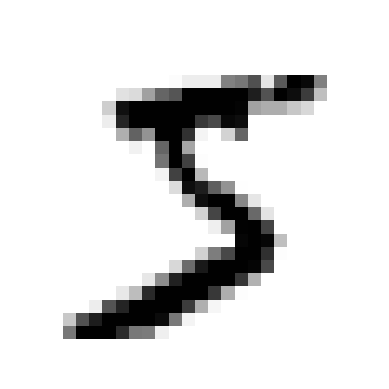

In [5]:
X = X.to_numpy()
y = y.to_numpy()
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
# target listesi tipi object olduğu için bunu numaraya çevirmeyi tercih ediyoruz
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y = y.astype(np.uint8)

In [9]:
# Veriseti halihazırda shuffled edildiği için tekrar uğraşmaya gerek yoktur.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier
firstly, only try to identify one digit - for example number 5

In [10]:
y_train_5 = (y_train == 5) # tüm 5 değerine sahip olanlar için True olacak, diğerleri için False olacak
y_test_5 = (y_test == 5)

In [11]:
# from sklearn.linear_model import SGDClassifier
# Bu classifier büyük verisetleri ile verimli bir şekilde başa çıkabiliyor.
# SGDClassifier relies on randomness during training so "random_state"
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
# Yukarıda baktığımız 5 görselini doğru tahmin etti fakat modeli değerlendirelim.
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [13]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone
# Below code is same with the Scikit-learn's cross_val_score()
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [14]:
# from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [15]:
# from sklearn.base import BaseEstimator
# görsellerin sadece %10'u 5 rakamını gösterir bu yüzden doğal olarak %90 civarı doğruluk tahmini yapıyor.

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Çarpık veri kümeleri ile çalışırken bu yüzden genellikle accuracy skor tercih edilmez. (Bir sınıf diğerlerinden daha sık bulunuyorsa)

### Confusion Matrix

In [16]:
# from sklearn.model_selection import cross_val_predict
# temiz bir tahmin değeri alır yani train setini görmeden test eder ve tahminleri döndürür

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

First row is the negative classes and second row is the positive classes

First column is negative and second column is positive

True positives and true negatives yani diagonal olan kısım accuracy değerini verir

In [18]:
y_train_perfect_predictions = y_train_5 # pretend we reach perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall

In [19]:
# from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [20]:
# from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # SGDClassifier uses a threshold equal to 0

array([ True])

In [23]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # raising the threshold decreases the recall

array([False])

In [24]:
# How to decide which threshold is better

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
# bu sefer decision_function çalıştı yani decision_scores return edecek ve bunları kullanarak tüm thresholdlar için recall, precision bulacağız

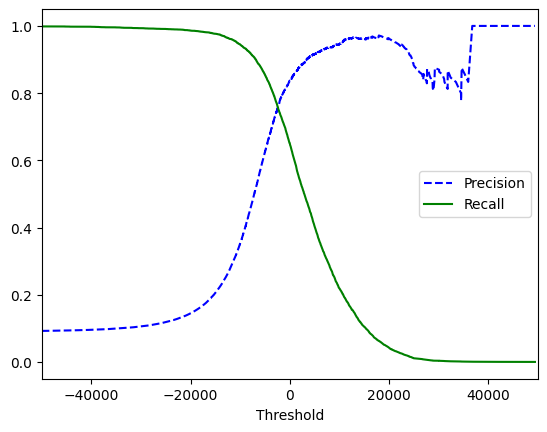

In [25]:
# from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlim([-50000, 50000])
  plt.xlabel("Threshold")
  plt.legend()

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

In [26]:
# Burada precision, recall tercihi projeye ve istenilen şeylere göre değişebilir, örneğin yüksek precision değeri istiyorsak

thresholds_90_precision = thresholds[np.argmax(precisions >= 0.90)]
thresholds_90_precision

3370.0194991439557

In [27]:
y_train_pred_90 = (y_scores >= thresholds_90_precision)

precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90)
# İstediğimiz değerlere ulaşmak mümkün tabii ama burada recall değeri de önemli ve bu yararlı bir işlem denemez

(0.9000345901072293, 0.4799852425751706)

### The ROC Curve
Receiver Operating Characteristics (ROC) bu tool binary-classifier ile kullanılan başka bir araçtır.

In [28]:
# Instead of plotting precision versus recall, the ROC curve plots the true positive rate against the false positive rate
# FPR is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative

# from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

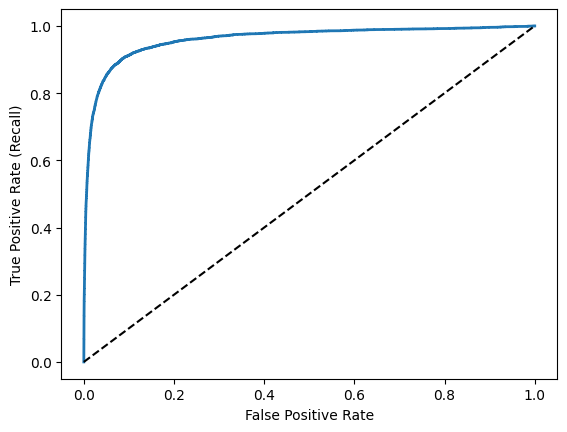

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")

# iyi bir classifier diagonal olarak geçen çizgiden uzakta durandır ya sol üst köşe
plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
# from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [31]:
# Bu işlemi bir de RandomForestClassifier için deneyeceğiz fakat bu method decision_function yerine predict_proba fonksiyonuna sahip
# predict_proba returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class
# from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

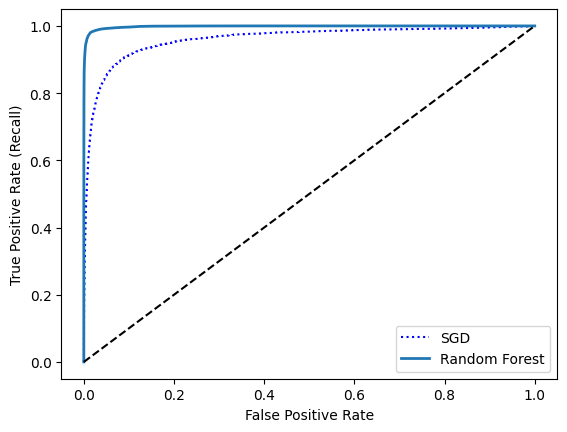

In [32]:
# Bizim sınıflara ihtiyacımız var probabilities kısmına değil o yüzden bir düzenleme yapacağız
y_scores_forest = y_probas_forest[:, 1] # score = proba of postive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
# RandomForest daha iyi sonuç gösterdi çünkü sol köşeye daha yakın

In [33]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification

Random Forest ve Naive Bayes classifiers gibi sınıflandırıcılar multiclass problemleri için kullanılabilirken, SVM ve Linear Classifiers ikili sınıflandırma içindir.

**One-Versus-All (OvA):** Mesela 10 tane sınıfımız var ise her sınıf için olacak şekilde 10 tane dedektöre sahip olduğumuz düşünülebilir ve bunlar her örnek için decision score alırız ve bunlar arasından hangisinin değeri yüksekse o sınıf kabul edilir. Buna One-Versus-All yöntemi denir.

**One-Versus-One (OvO):** Her çift için binary classifier eğitmektir mesela 0. ile 1. class eğitilip onlar arasında deneme yapılacak sonra 0. ile 2. arası sonra 0. ile 3. gibi tüm kombinasyonlar için eğitilip sonuçlar karşılaştırılacak ve en çok düello kazanan da sınıfı belirlemiş olacak. MNIST dataset için düşünürsek N x (N-1) / 2 yani 10 sınıf için toplamda 45 tane classifier eğitmeliyiz. SVM gibi algoritmalar biraz işi hızlandırsa da genellikle OvA tercih ediyoruz.

In [34]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [35]:
# En büyük değer sınıf olarak kabul edildi ama 10 classes için de değer döndürüyor
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [36]:
np.argmax(some_digit_scores), sgd_clf.classes_, sgd_clf.classes_[5]

(3, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), 5)

In [41]:
# ScikitLearn kütüphanesini OvO ya da OvA kullanmak için zorlayabiliriz
# from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [42]:
len(ovo_clf.estimators_)

45

In [43]:
# Training a RandomForestClassifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
# Burada direk olasılık listesini alırız classifier otomatik olarak her örneğe değerini atar
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [45]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [46]:
# from sklearn.preprocessing import StandardScaler
# Scaling yapmaz sonuçlarımızı basit bir şekilde arttırır.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

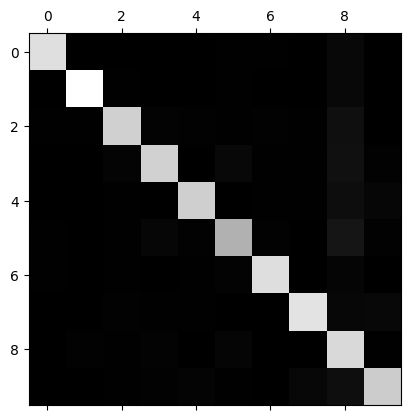

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

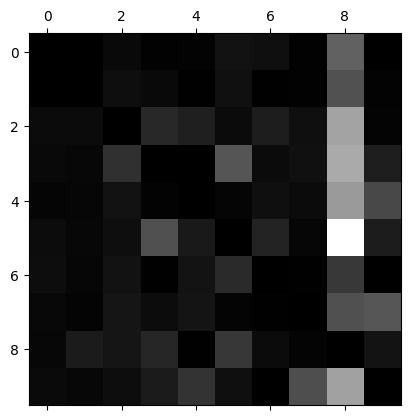

In [50]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
# Bu görselde 8 olarak birçok numaranın yanlış sınıflandırıldığı görünüyor ama 8'ler doğru sınıflandırılmış bundan sonra bu problemi çözmek için çalışılabilir.
# 8'ler ile daha fazla örnek toplanabilir closed loops tespiti için algoritmalar geliştirilebilir, fakat bu zordur ve zaman tüketicidir

In [57]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

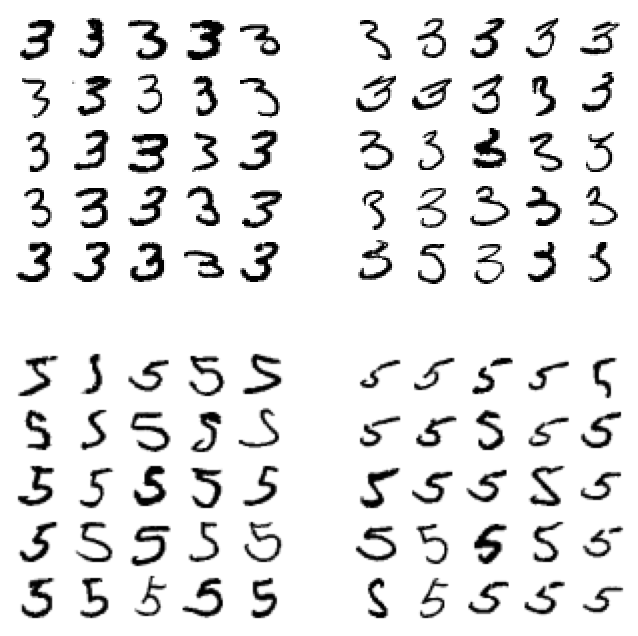

In [58]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()
# Sol kısımdakiler 3 olarak sınıflandırılanlar, sağdakiler ise 5 olarak sınıflandırılanlardır bazı görseller insanlar tarafından bile zor anlaşılıyor özellike kötü yazılması
# makinenin de anlayamamasına sebep oluyor basit bir model kullandığımız için her pixel için olan ağırlık ile değeri çarpıp bize sonucu veriyor bu model kolaylıkla yanılabilir

## Multilabel Classification
Şimdiye kadar her görselde tespit edilmesi gereken tek bir şey vardı numara gibi fakat bazı durumlarda birden çok tespit edilmesi gereken şey olabilir mesela bir görsel 3 tane insan olabilir ve bunların isminin ne olduğunu ya da kim olduklarını tahmin etmeye çalışabiliriz bu da modelimizin sonuç olarak birden fazla binary tags döndürmesi gerektiği anlamına gelir bu olaya da multilabel classification system denir.

In [59]:
# Face Recognition için detaylı bir kısım değildir fakat basit örneklerine bakalım
# from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# two target labels vardır biri (7,8,9) mu diye bakacak diğeri ise tek sayı mı diye bakacak ve ona göre sonuç döndürecek
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [60]:
# 5 sayısı 7den büyük değil fakat tek sayı bu yüzden [False, True]
knn_clf.predict([some_digit])

array([[False,  True]])

In [61]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
# Bu kod tüm labels sayısının eşit olduğunu varsayarak f1-score hesaplıyor average="weighted" örnek sayısına bağlı olarak ağırlıkları verir

0.976410265560605

## Multioutput Classification
Bu da basit şekilde multioutput multiclass classification'dır. Multilabel classification işleminde her label için farklı class'lar olursa bunu yapabiliriz.

In [62]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
# Buradaki amaç noisy görselleri clean hale getirmektir

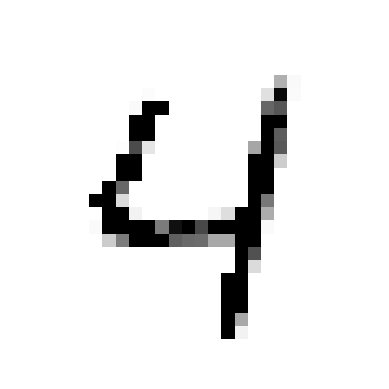

In [65]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4]])
plot_digits(clean_digit)